In [2]:
%pip install seaborn

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


Matplotlib is building the font cache; this may take a moment.


In [4]:
import seaborn as sns

In [6]:
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


(0.0, 200.0)

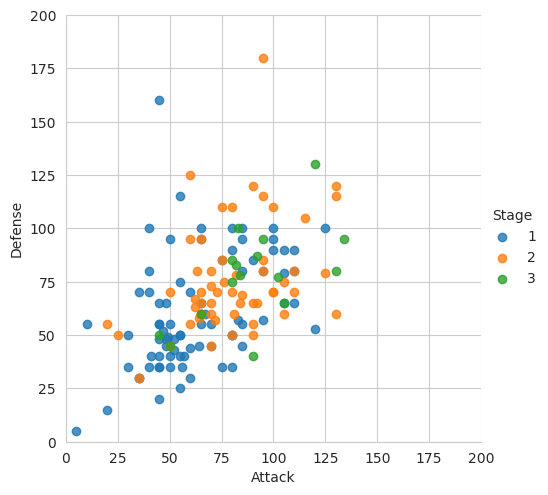

In [12]:
sns.set_style('whitegrid')
sns.lmplot(x='Attack', y='Defense', data=df, 
           fit_reg=False, # No regression line
           hue = 'Stage') # Color by evolution stage)
plt.ylim(0,200)
plt.xlim(0,200)

<Axes: >

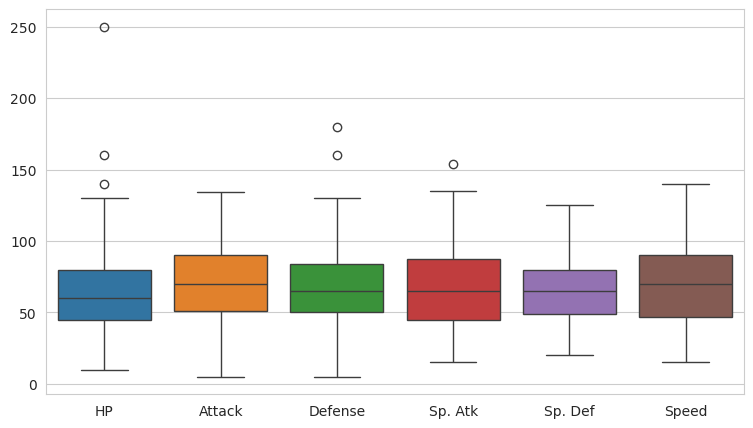

In [20]:
#box plot for our Pokémon’s combat stats
stats_df = df.drop(['Total','Stage','Legendary'], axis = 1)

plt.figure(figsize=(9,5)) #plot dimensions
sns.boxplot(data=stats_df)

<ipython-input-26-3b460924f680>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type 1',


Text(0.5, 1.0, 'Attack by Type')

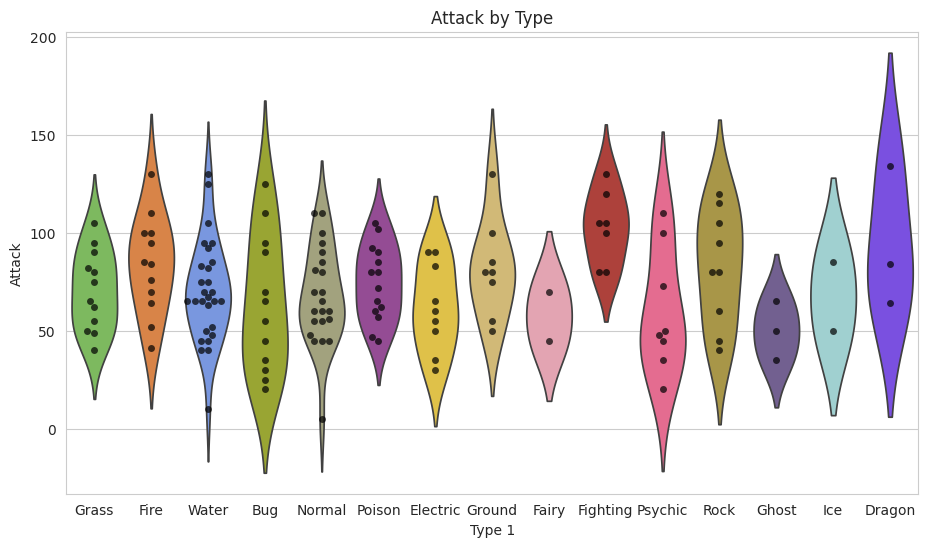

In [26]:

# Set theme
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
plt.figure(figsize=(11,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [32]:

stats_df.head()
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()
#stats_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


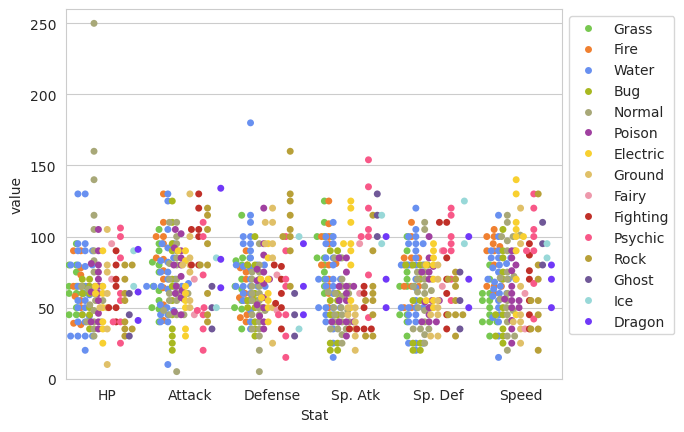

In [35]:
sns.swarmplot(x='Stat',
              y='value', 
              data=melted_df, 
              hue='Type 1',
              dodge=True,
              palette=pkmn_type_colors)
plt.ylim(0, 260)
plt.legend(bbox_to_anchor=(1, 1), loc=2)